In [1]:
# Theem thu vien
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
# sigmoid
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [54]:
#load data tu dataset.csv
data = pd.read_csv('/content/drive/MyDrive/VCCorp/dataset.csv').values
N, d = data.shape
x = data[:, 0:d-1].reshape(-1,d-1)
y = data[:, 2].reshape(-1, 1)

Text(0, 0.5, 'kinh nghiem (nam)')

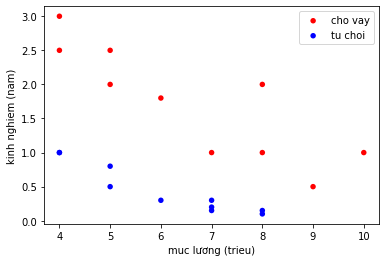

In [55]:
#vẽ data bằng scatter
plt.scatter(x[:10, 0], x[:10, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x[10:, 0], x[10:, 1], c='blue', edgecolors='none', s=30, label='tu choi')
# đặt chú giải lên cac =s trục
plt.legend(loc=1)
plt.xlabel('muc lương (trieu)')
plt.ylabel('kinh nghiem (nam)')

In [56]:
# khởi tạo x và w, thêm 1 cột 1 vào x
x = np.hstack((np.ones((N, 1)), x))
w = np.array([0.,0.1,0.1]).reshape(-1,1)

In [57]:
# So lan lặp bước 2
numOfIteration = 1000
cost = np.zeros((numOfIteration,1))
learning_rate = 0.01
for i in range(1, numOfIteration):
  # Tinh gia tri du doan
  y_predict = sigmoid(np.dot(x, w))
  cost[i] = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))
  # Gradient descent
  w = w - learning_rate * np.dot(x.T, y_predict-y)
  print(cost[i])

[14.3783222]
[14.37536009]
[14.52617153]
[14.51426849]
[14.61633124]
[14.45526156]
[14.40335079]
[14.14832828]
[13.97986699]
[13.71835467]
[13.48635327]
[13.25428121]
[12.99278425]
[12.79528802]
[12.52560943]
[12.35759173]
[12.09391963]
[11.94844506]
[11.70025271]
[11.57135333]
[11.34455593]
[11.22796382]
[11.02570355]
[10.91881102]
[10.74211332]
[10.64364326]
[10.49198407]
[10.40156765]
[10.27334863]
[10.19110203]
[10.08403294]
[10.01018498]
[9.92158252]
[9.85619039]
[9.78321018]
[9.72599049]
[9.66581037]
[9.61609685]
[9.56606508]
[9.52287899]
[9.48063066]
[9.44282419]
[9.40636077]
[9.37277831]
[9.34050283]
[9.31011155]
[9.28081799]
[9.252781]
[9.22560668]
[9.19929876]
[9.1736558]
[9.14863912]
[9.12414184]
[9.10012349]
[9.07652441]
[9.05331276]
[9.03045303]
[9.007922]
[8.98569682]
[8.96376049]
[8.94209698]
[8.92069328]
[8.8995372]
[8.87861825]
[8.85792654]
[8.83745323]
[8.81718992]
[8.79712892]
[8.77726292]
[8.7575851]
[8.73808899]
[8.71876849]
[8.69961781]
[8.68063146]
[8.66180423]
[

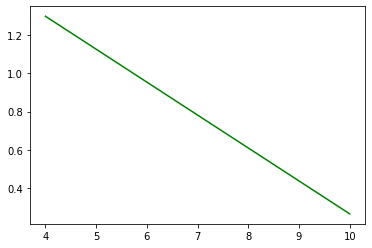

In [58]:
# Vẽ đường phân cách
t = 0.5
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ \
np.log(1/t-1))/w[2]), 'g')
plt.show()

In [59]:
# Lưu weight dùng numpy.save(), định dạng '.npy'
np.save('weight logistic.npy', w)
# Load weight từ file ''.npy'
w = np.load('weight logistic.npy')
print(w)

[[-7.25683504]
 [ 0.62975152]
 [ 3.6436906 ]]


In [31]:
# Logistic Regression dùng thư viện sklearn
from sklearn.linear_model import LogisticRegression
# Load data từ file csv
data = pd.read_csv('/content/drive/MyDrive/VCCorp/dataset.csv').values
N, d = data.shape
x = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)

Text(0, 0.5, 'kinh nghiệm (năm)')

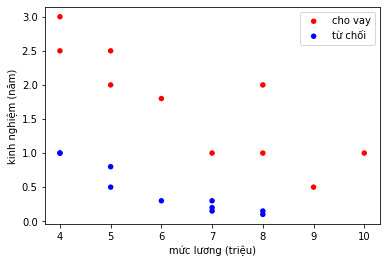

In [32]:
# V‡ data bằng scatter
plt.scatter(x[:10, 0], x[:10, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x[10:, 0], x[10:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

In [33]:
# Tạo mô hình Logistic Regression và train
logreg = LogisticRegression()
logreg.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
# Lưu các tham số vào mảng
wg = np.zeros( (3, 1) )
wg[0, 0] = logreg.intercept_
wg[1:, 0] = logreg.coef_

In [38]:
wg

array([[-6.4390718 ],
       [ 0.66716139],
       [ 2.09426755]])

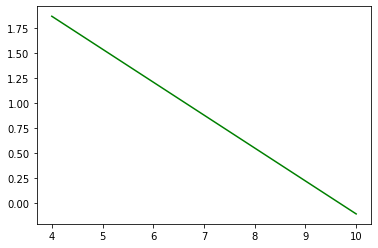

In [37]:
t = 0.5
plt.plot((4, 10),(-(wg[0]+4*w[1]+ np.log(1/t-1))/wg[2], -(wg[0] + 10*wg[1]+ \
np.log(1/t-1))/wg[2]), 'g')
plt.show()

In [60]:
# Lưu các tham số dùng đinh dạng npz
np.savez('w logistic.npz', a=logreg.intercept_, b=logreg.coef_)
# Load các tham dùng numpy.load(), file '.npz'
k = np.load('w logistic.npz')
logreg.intercept_ = k['a']
logreg.coef_ = k['b']